In [1]:
def calculate_x(x0, k):

    if k == 0:
        return x0
    elif 0 <= x0 < 0.5:
        x0 = 2 * x0
    elif 0.5 < x0 <= 1:
        x0 = 2 * x0 - 1

    #print(f"x({k}) = {x0:.4f}")

    return calculate_x(x0, k - 1)


 Considerand valoarea initiala x0 = 0.1, ce valoare va avea x la pasul k = 60?


In [2]:
x0=0.1
k=60
x60 = calculate_x(x0, k)
if x60 is not None:
    print(f"Valoarea lui x la pasul k = {k} este: {x60:.4f}")

Valoarea lui x la pasul k = 60 este: 0.5000


Scrieti o procedura care utilizeaza eliminarea Gaussiana pentru a rezolva un sistem determinat Ax = b

In [3]:
import numpy as np

def gaussian_elimination(A, b):
    n = len(A)
    for k in range(0, n - 1):
        for i in range(k + 1, n):
            A[i][k] = -A[i][k] / A[k][k]
            for j in range(k + 1, n):
                A[i][j] = A[i][j] + A[k][j] * A[i][k]
            b[i] = b[i] + b[k] * A[i][k]


Implementati o procedura pentru rezolvarea sistemelor superior triunghiulare prin metoda substitutiei (algoritmul UTRIS), pornind de
la codul algoritmului LTRIS

In [4]:
def upper_triangular_solve(U, b):
    n = len(U)
    x = np.zeros(n)

    for i in range(n - 1, -1, -1):
        sum_ax = np.dot(U[i, i + 1:], x[i + 1:])
        x[i] = (b[i] - sum_ax) / U[i, i]

    return x


Testati solutia pe un sistem de dimensiune n = 6, in care matricea A
are elemente aleatoare

In [5]:
n = 6
A = np.random.randn(n, n)
b = np.random.randn(n)

# Aplicam eliminarea Gaussiana
gaussian_elimination(A, b)
print(A)
print(b)
# Rezolvam sistemul superior
x = upper_triangular_solve(A, b)
print("Solutia sistemului Ax = b:")
print(x)

[[ 1.64145249  0.78404393 -1.34964967 -1.09636864 -0.12382247 -0.44378697]
 [-0.02643569  0.45222614 -0.4256818   0.89026579  2.29418543  0.43384627]
 [ 0.21288225  1.95533623 -1.98430555  1.67263151  3.27224712  0.4773669 ]
 [-0.64007081  0.93874864  0.51542197  1.9062768   3.40246013  1.32954681]
 [-0.43676363 -0.57964701  0.6186526  -0.9067974  -2.11728651 -2.31913204]
 [ 0.86631372 -0.82902817 -1.4266726   2.56465174  1.15372142 -0.85346204]]
[ 0.24949353  0.05510181 -0.38337966 -2.64218865  1.75202807 -3.87548823]
Solutia sistemului Ax = b:
[-3.02622186 10.58326703 -3.3908822   5.80141751 -5.8012845   4.54090288]


Construiti matricea sistemului A din variabila independenta z si termenul liber din variabila dependenta w.

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv("regresie.csv", header=None, names=["z", "w"])
A = np.column_stack((np.ones(len(data)), data["z"]))
b = data["w"]

Calculati solutia CMMP (ecuatia dreptei) si afisati grafic punctele corespunzatoare masuratorilor, cat si dreapta de regresie obtinuta

Parametrii dreptei de regresie:
a = -1.869038122942074
b = -1.1317755454924625


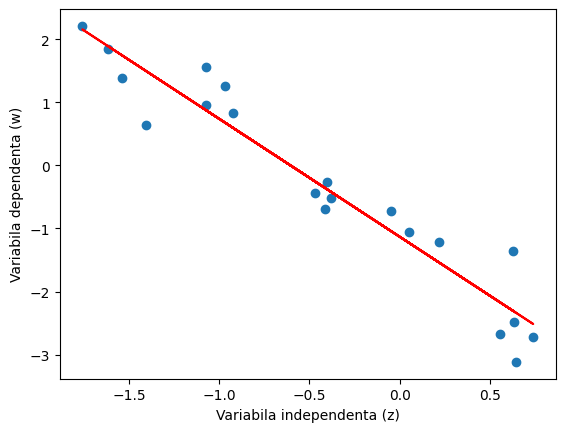

In [8]:
params = np.linalg.lstsq(A, b, rcond=None)[0]

a, b = params[1], params[0]

print("Parametrii dreptei de regresie:")
print(f"a = {a}")
print(f"b = {b}")

# Afisam punctele si dreapta de regresie pe un grafic
plt.scatter(data["z"], data["w"], label="Puncte de masurare")
plt.plot(data["z"], a * data["z"] + b, color='red', label="Dreapta de regresie")

plt.xlabel("Variabila independenta (z)")
plt.ylabel("Variabila dependenta (w)")

plt.show()